📝 Project: Classification on Food Orders Dataset
In this project, we work with a real-world dataset related to customer food ordering behavior. The dataset contains demographic and behavioral information such as gender, marital status, occupation, income, education, family size, location (latitude & longitude), and user feedback. The target variable, Output, indicates whether or not a customer placed a food order.

Our goal is to build a machine learning pipeline—from data exploration and preprocessing to model building and evaluation—to classify whether a customer is likely to place a food order.

🎯 Objective
The main objective is to build and compare the performance of multiple machine learning models to accurately predict the food order status (Order or No Order). This classification helps food delivery platforms better understand customer behavior and design targeted marketing and service strategies.

🤖 Models Evaluated
- Logistic Regression

- Naive Bayes

- Decision Tree

- Random Forest

- AdaBoost

- XGBoost

- ANN

- SVM

To evaluate model performance, we use the following metrics:

- Accuracy – Overall correctness of the model

- Precision – How many predicted "orders" were actually correct

- Recall – How many actual "orders" were correctly identified

- F1 Score – Harmonic mean of precision and recall

- Confusion Matrix – Visual summary of prediction performance



Outcome
- By comparing these metrics across different models, we aim to:

- Select the best-performing model for classifying food orders

- Provide actionable insights to improve customer targeting, delivery efficiency, and marketing efforts

- Help businesses optimize operations based on predictive insights into user behavior

In [6]:
import pandas as pd
import numpy as np

In [7]:
data=pd.read_csv("/Users/pravaliparvataneni/Desktop/sudents and projects/S6/Classification/Dataset (1).csv")

In [4]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [5]:
data.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


<h1>Data Analysis with Visualization</h1>

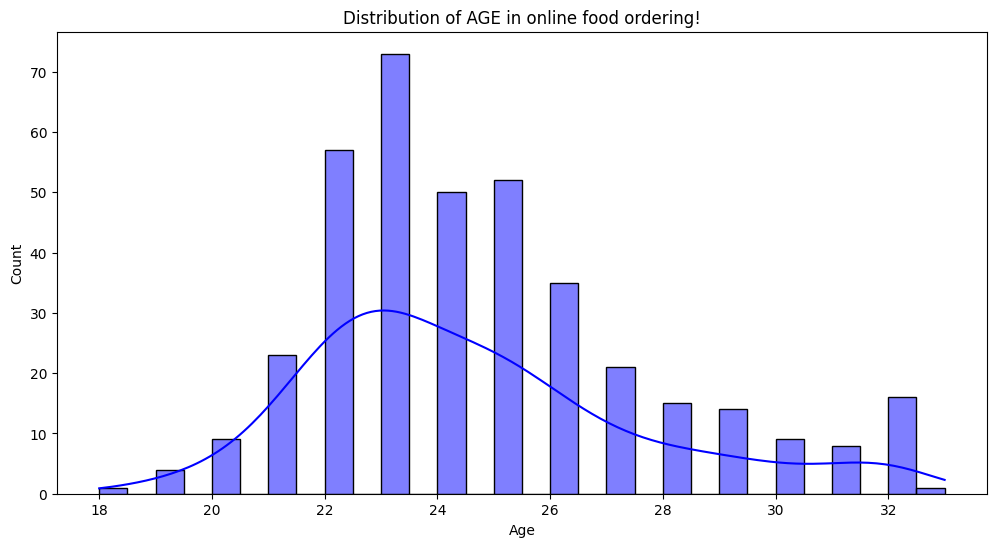

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(data['Age'], bins = 30, kde= True, color = 'blue')
plt.title('Distribution of AGE in online food ordering!')
plt.show()

People in 20s are ordering food more.

/var/folders/f8/mj2vjl493b1362dvk6tb7bvr0000gn/T/ipykernel_3944/2106257729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Gender', palette='cool')


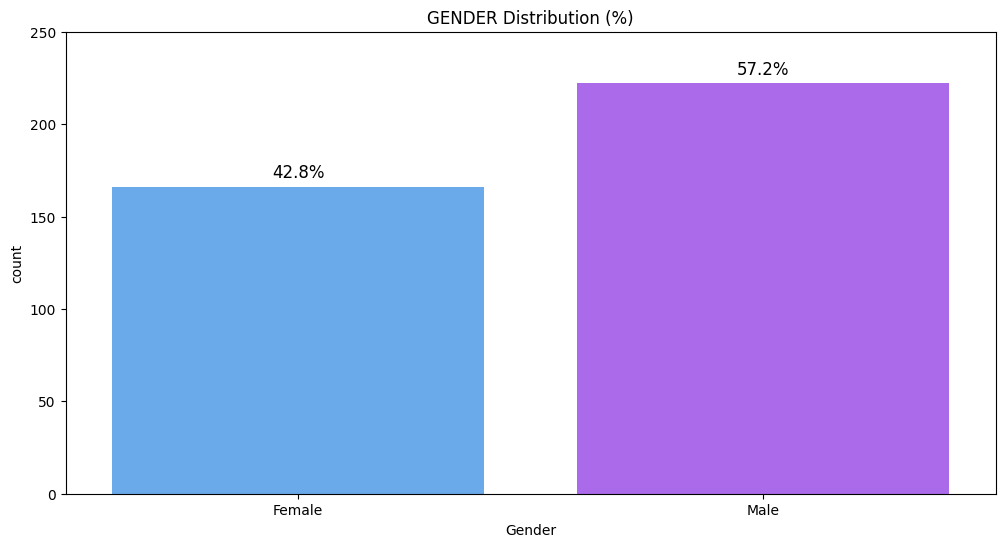

In [12]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='Gender', palette='cool')

ax.set_ylim(0, 250) 

total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height() + 5),
                ha='center', fontsize=12)

plt.title("GENDER Distribution (%)")
plt.show()

male customers are 14.4% more than female customers

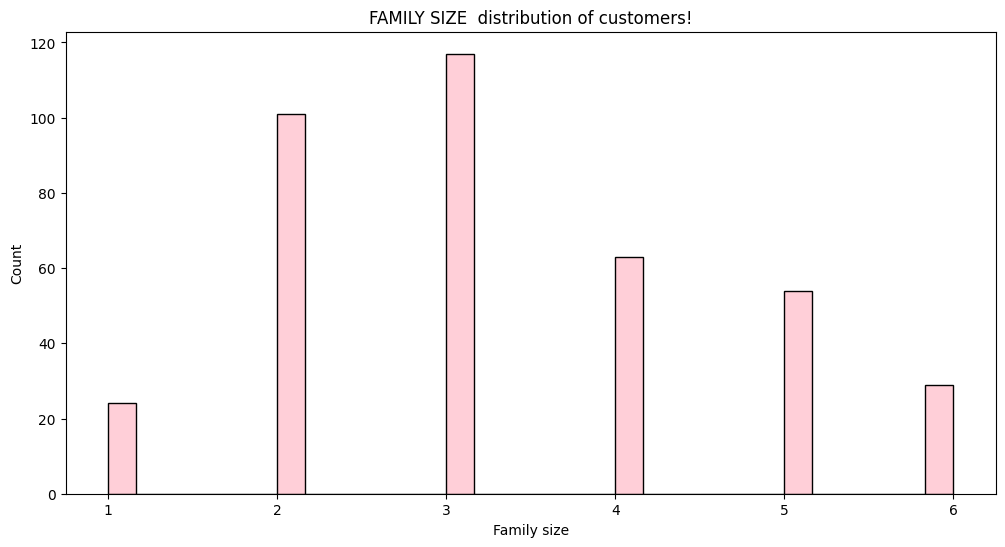

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(data['Family size'], bins = 30, color = 'pink')
plt.title('FAMILY SIZE  distribution of customers!')
plt.show()


Larger families are not ordering more. People with 2-3 family members tend to order more.

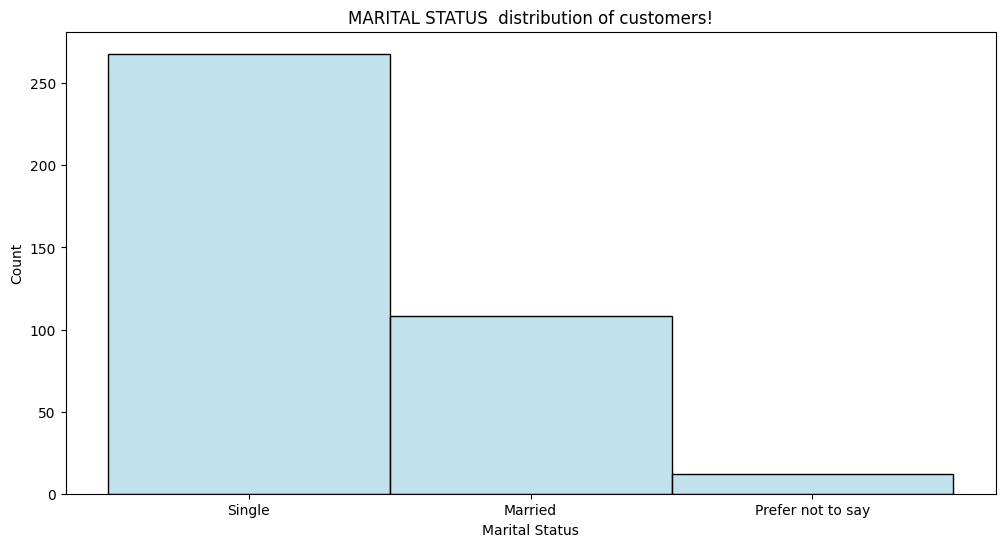

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(data['Marital Status'], bins = 30, color = 'lightblue')
plt.title('MARITAL STATUS  distribution of customers!')
plt.show()

Singles tend to order more than married customers.

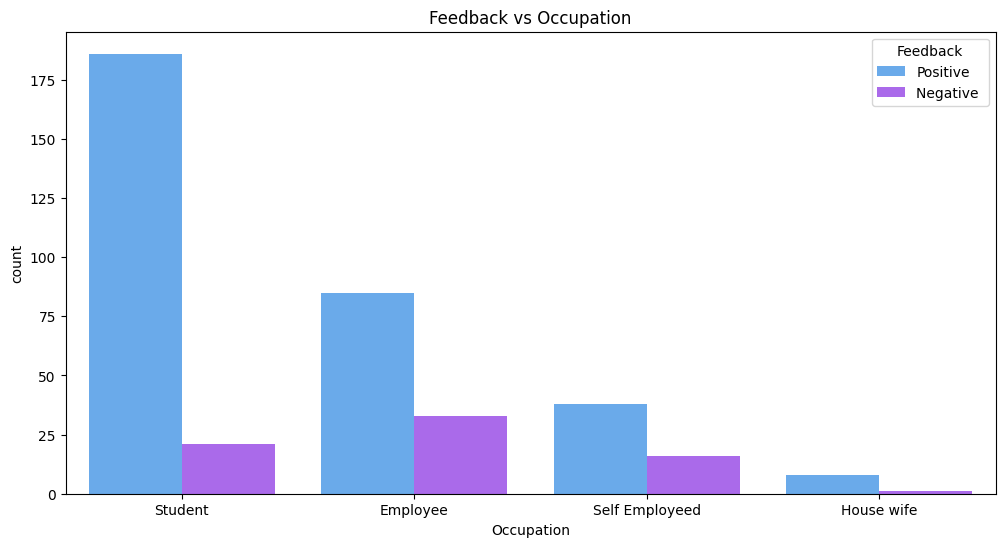

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Occupation', hue='Feedback', palette = 'cool')
plt.title("Feedback vs Occupation")
plt.legend(title="Feedback")
plt.show()

it is shown that, students contributed the highest volume of feedback, with a strong skew towards positive responses. employees

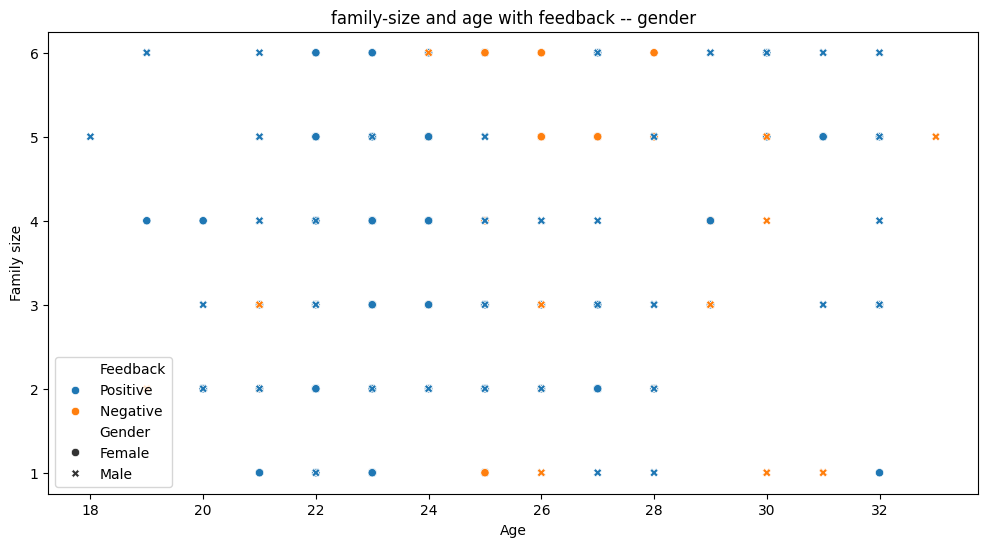

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x='Age', y = 'Family size', hue = 'Feedback', style = 'Gender')
plt.title('family-size and age with feedback -- gender')
plt.show()

Most of negative feedback are given by people late in 20s or with higher family size

In [7]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply label encoding to all relevant categorical columns
for col in ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback']:
    data[col] = le.fit_transform(data[col])


In [8]:
data = data.drop('Unnamed: 12', axis=1)

In [9]:
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,1,0
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,2,3,4,2,2,12.9766,77.5993,560001,1,1
384,23,0,2,3,4,2,4,12.9854,77.7081,560048,1,1
385,22,0,2,3,4,2,5,12.9850,77.5533,560010,1,1
386,23,1,2,3,2,2,2,12.9770,77.5773,560009,1,1


In [10]:
X=data.drop('Output',axis=1)
y=data['Output']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=42)

In [17]:
print("Shape of train dataset : ", X_train.shape)
print("Shape of test dataset : ", X_test.shape)

Shape of train dataset :  (310, 11)
Shape of test dataset :  (78, 11)


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8589743589743589
[[ 6  6]
 [ 5 61]]
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.91      0.92      0.92        66

    accuracy                           0.86        78
   macro avg       0.73      0.71      0.72        78
weighted avg       0.85      0.86      0.86        78



# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8974358974358975
[[ 6  6]
 [ 2 64]]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.91      0.97      0.94        66

    accuracy                           0.90        78
   macro avg       0.83      0.73      0.77        78
weighted avg       0.89      0.90      0.89        78



# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8333333333333334
Confusion Matrix:
 [[ 6  6]
 [ 7 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.50      0.48        12
           1       0.91      0.89      0.90        66

    accuracy                           0.83        78
   macro avg       0.68      0.70      0.69        78
weighted avg       0.84      0.83      0.84        78



# SVM

In [25]:
#kernel=rbf
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf', random_state=42)  # 'rbf' is good for non-linear problems
svm_rbf.fit(X_train, y_train)

y_pred_svm = svm_rbf.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm, zero_division=0))

SVM Accuracy: 0.8461538461538461
Confusion Matrix:
 [[ 0 12]
 [ 0 66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.85      1.00      0.92        66

    accuracy                           0.85        78
   macro avg       0.42      0.50      0.46        78
weighted avg       0.72      0.85      0.78        78



# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8589743589743589
Confusion Matrix:
 [[ 7  5]
 [ 6 60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.92      0.91      0.92        66

    accuracy                           0.86        78
   macro avg       0.73      0.75      0.74        78
weighted avg       0.86      0.86      0.86        78



# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8846153846153846
Confusion Matrix:
 [[ 7  5]
 [ 4 62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.93      0.94      0.93        66

    accuracy                           0.88        78
   macro avg       0.78      0.76      0.77        78
weighted avg       0.88      0.88      0.88        78



# Adaboost

In [29]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))


AdaBoost Accuracy: 0.8717948717948718
Confusion Matrix:
 [[ 5  7]
 [ 3 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.90      0.95      0.93        66

    accuracy                           0.87        78
   macro avg       0.76      0.69      0.71        78
weighted avg       0.86      0.87      0.86        78



# Hyperparameter tuning with GridSearchCv

In [30]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print("Best XGB Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best XGB Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Best CV Score: 0.8903225806451612


# XGBoost

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_xgb = XGBClassifier(
    learning_rate=0.2,
    max_depth=7,
    n_estimators=100,
    eval_metric='logloss',
    random_state=42
)

best_xgb.fit(X_train, y_train)
y_pred_best_xgb = best_xgb.predict(X_test)

print("Final XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_best_xgb))


Final XGBoost Accuracy: 0.8846153846153846
Confusion Matrix:
 [[ 9  3]
 [ 6 60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.95      0.91      0.93        66

    accuracy                           0.88        78
   macro avg       0.78      0.83      0.80        78
weighted avg       0.90      0.88      0.89        78



# ANN

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


# Build ANN model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer with number of features
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy:.4f}")


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6394 - loss: 17432.6250 - val_accuracy: 0.2419 - val_loss: 957.0676
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5845 - loss: 2632.5652 - val_accuracy: 0.7581 - val_loss: 4667.8335
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6726 - loss: 3491.5671 - val_accuracy: 0.7581 - val_loss: 226.7292
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7283 - loss: 791.7094 - val_accuracy: 0.2419 - val_loss: 167.4817
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6088 - loss: 726.8734 - val_accuracy: 0.2419 - val_loss: 2076.6633
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4633 - loss: 1223.0388 - val_accuracy: 0.7581 - val_loss: 24.9162
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6820 - loss: 245.9138 - val_accuracy: 0.2419 - val_loss: 1728.1194
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4664 - loss: 1297.4106 - va

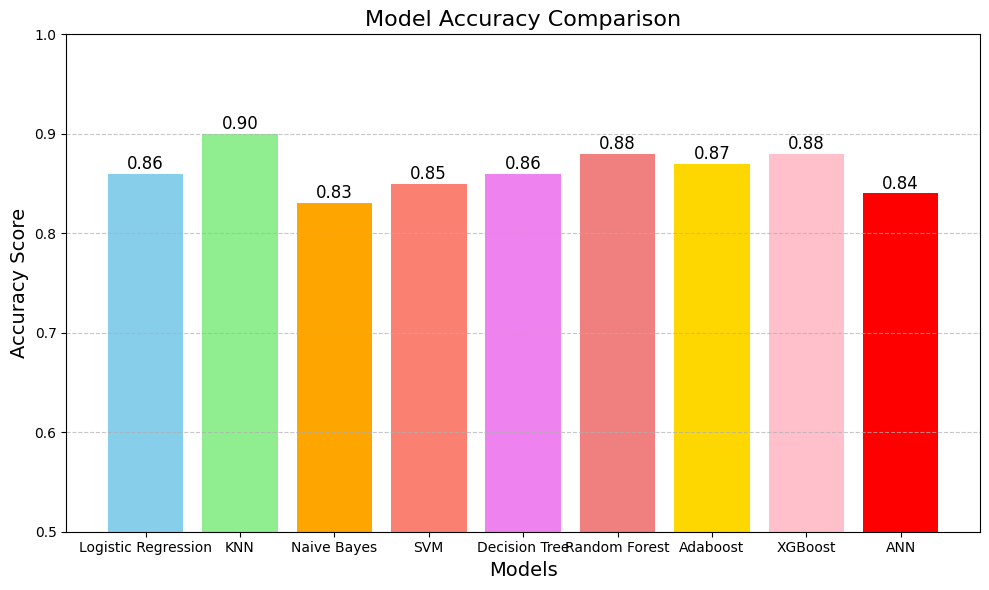

In [44]:

import matplotlib.pyplot as plt

# Accuracy scores
model_names = ['Logistic Regression', 'KNN', 'Naive Bayes','SVM','Decision Tree', 'Random Forest', 'Adaboost', 'XGBoost', 'ANN']
accuracy_scores = [0.86, 0.90, 0.83, 0.85, 0.86, 0.88, 0.87, 0.88, 0.84]

# Add a color for each model
colors = ['skyblue', 'lightgreen', 'orange', 'salmon', 'violet', 'lightcoral', 'gold', 'pink', 'red']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=colors)

# Add accuracy labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', fontsize=12)

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.ylim(0.5, 1.0)  # Adjusted to include ANN's score
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



The bar graph provides a clear visual representation of the accuracy scores for different machine learning models. KNN stands out as the most accurate model, while Naive Bayes has the lowest accuracy. The graph also highlights the performance of other models, allowing for easy comparison and identification of top-performing models.